In [284]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

# Problem Statement - 
Implement a KNN model to classify the animals in to categories.


# About dataset:

The data set is all about the animals in all around the world.These animals mentioned in the dataset is classified with types from 1 to 7 as per their specific features like egg, milc, aquatic,ariborne, legs, tail etc..

Will do some EDA, find the correlations on features & target, then train the model,divide the data into train & test set & then will apply KNN classifier on the model for test & prediction.



# Load the data

In [285]:
zoo=pd.read_csv('C:/Users/VivekG/Desktop/My Files- Vivek/ExcelrThane/DS/Assignments/KNN/Zoo.csv')


In [286]:
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [287]:
# EDA & Visualization

In [288]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [289]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [290]:
zoo.shape

(101, 18)

In [291]:
zoo[zoo.duplicated()].shape

(0, 18)

In [292]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [293]:
zoo.type.value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [294]:
zoo.type.unique()

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

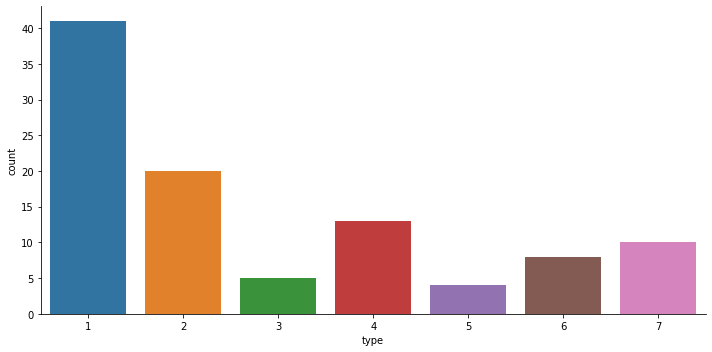

In [295]:
sns.factorplot('type', data=zoo, kind="count",size = 5,aspect = 2)

# correlation

In [296]:

corr=zoo.corr()
corr

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
hair,1.000000,-0.427851,-0.817382,0.878503,-0.198431,-0.473554,-0.154769,0.492531,0.191681,0.441149,-0.104245,-0.280313,0.394009,0.048973,0.207208,0.455020,-0.562384
feathers,-0.427851,1.000000,0.419248,-0.410761,0.656553,-0.058552,-0.104430,-0.613631,0.231403,0.254588,-0.145739,-0.223541,-0.206686,0.292569,0.031586,-0.135934,-0.197520
eggs,-0.817382,0.419248,1.000000,-0.938848,0.376646,0.376244,0.011605,-0.642150,-0.340420,-0.382777,0.098689,0.164796,-0.224918,-0.221090,-0.155610,-0.514650,0.661825
milk,0.878503,-0.410761,-0.938848,1.000000,-0.366765,-0.362613,-0.029721,0.628168,0.384958,0.423527,-0.242449,-0.156328,0.214196,0.210026,0.163928,0.574906,-0.723683
airborne,-0.198431,0.656553,0.376646,-0.366765,1.000000,-0.172638,-0.295181,-0.594311,-0.104718,0.286039,0.008528,-0.251157,0.043712,0.009482,0.063274,-0.349768,0.022677
aquatic,-0.473554,-0.058552,0.376244,-0.362613,-0.172638,1.000000,0.375978,0.053150,0.022463,-0.637506,0.087915,0.604492,-0.360638,-0.034642,-0.224308,-0.111866,0.326639
predator,-0.154769,-0.104430,0.011605,-0.029721,-0.295181,0.375978,1.000000,0.129452,0.051022,-0.262931,0.115391,0.190302,-0.099723,0.018947,-0.309794,0.144790,0.061179
toothed,0.492531,-0.613631,-0.642150,0.628168,-0.594311,0.053150,0.129452,1.000000,0.575085,-0.065690,-0.062344,0.364292,-0.193476,0.310368,0.069430,0.344010,-0.471527
backbone,0.191681,0.231403,-0.340420,0.384958,-0.104718,0.022463,0.051022,0.575085,1.000000,0.207666,-0.246611,0.209499,-0.432856,0.731762,0.101733,0.356976,-0.828845
breathes,0.441149,0.254588,-0.382777,0.423527,0.286039,-0.637506,-0.262931,-0.065690,0.207666,1.000000,-0.120752,-0.617219,0.369868,0.088952,0.124068,0.204125,-0.519308


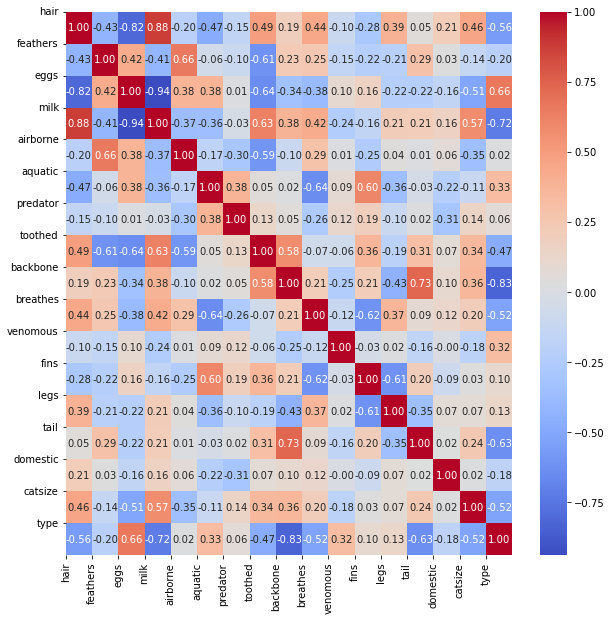

In [297]:
# visualize Correlations
corr=zoo.corr()
fig,ax=plt.subplots(figsize=(10,10))

sns.heatmap(corr,cmap='coolwarm',annot=True,fmt=".2f")
plt.xticks(range(len(corr.columns)),corr.columns);
plt.yticks(range(len(corr.columns)),corr.columns)

plt.show()

# Feature -Target Counts & Visualization

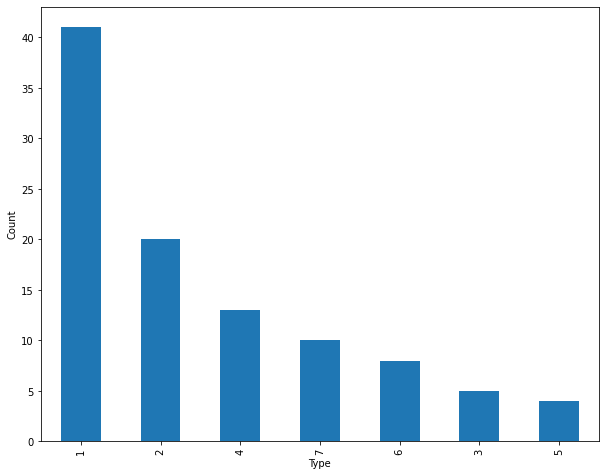

In [298]:
# type wise animal counts.

plt.figure(figsize=(10,8));
zoo.type.value_counts().plot(kind="bar");
plt.xlabel('Type');
plt.ylabel("Count");
plt.plot();
# Here you can see, mostly animals belong to the type 1.

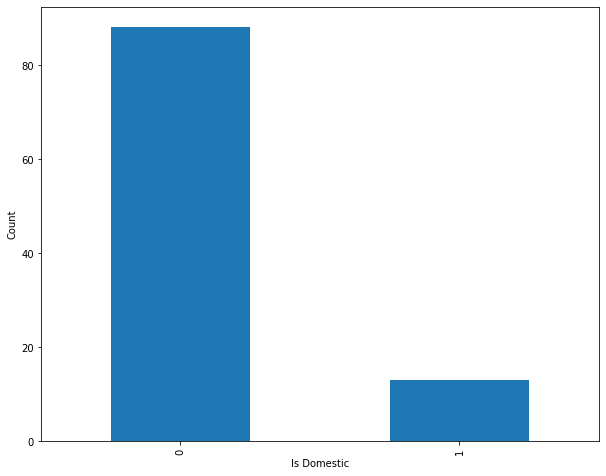

In [299]:
# check how many animals are domestic or not
plt.figure(figsize=(10,8));
zoo.domestic.value_counts().plot(kind="bar");
plt.xlabel('Is Domestic');
plt.ylabel("Count");
plt.plot();

Can see mostly there are animals which were not in domestic category.

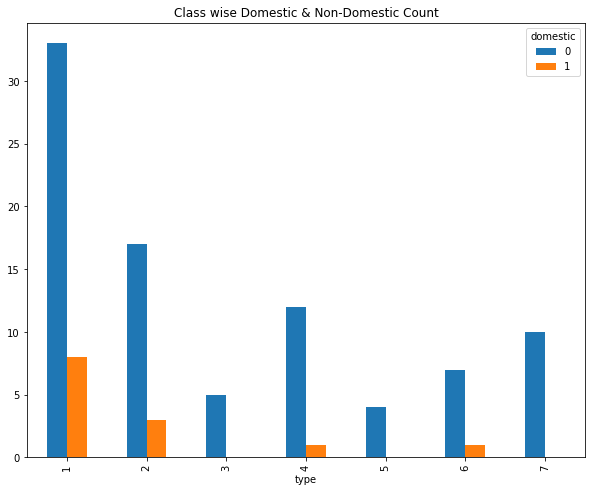

In [300]:
# Plot the domestic category & Type.
pd.crosstab(zoo.type, zoo.domestic).plot(kind="bar", figsize=(10, 8), title="Class wise Domestic & Non-Domestic Count");
plt.plot();

# As you see domestic animals for type 1 is high.

In [301]:
# Lets see how many are dairy animals.
zoo.milk.value_counts()             # 41 Animals are dairy animals.Need to find which category the are from.

0    60
1    41
Name: milk, dtype: int64

In [302]:
pd.crosstab(zoo.type,zoo.milk)             # Type 1 is the category whree the dairy animals are belongs to.

milk,0,1
type,,
1,0,41
2,20,0
3,5,0
4,13,0
5,4,0
6,8,0
7,10,0


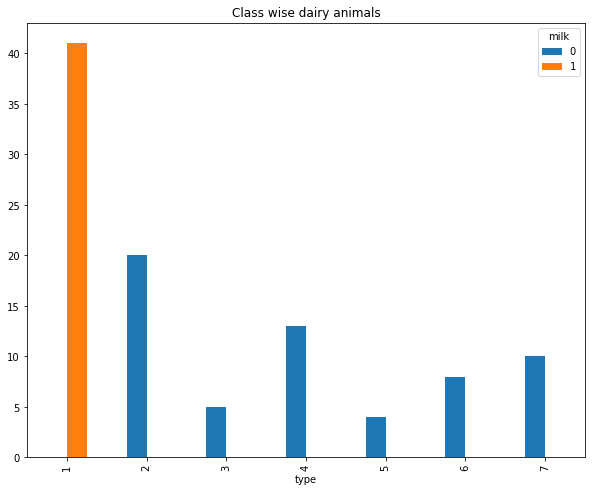

In [303]:
# plot the milk category & type
pd.crosstab(zoo.type, zoo.milk).plot(kind="bar", figsize=(10, 8), title="Class wise dairy animals");
plt.plot();

In [304]:
zoo[zoo.milk==1].shape[0]

41

In [305]:
zoo[zoo.type==1].shape[0]

41

In [306]:
# Find the aquatic types of animal counts.
zoo.aquatic.value_counts()

0    65
1    36
Name: aquatic, dtype: int64

In [307]:
zoo[zoo.aquatic==1].type.value_counts()

4    13
7     6
1     6
2     6
5     4
3     1
Name: type, dtype: int64

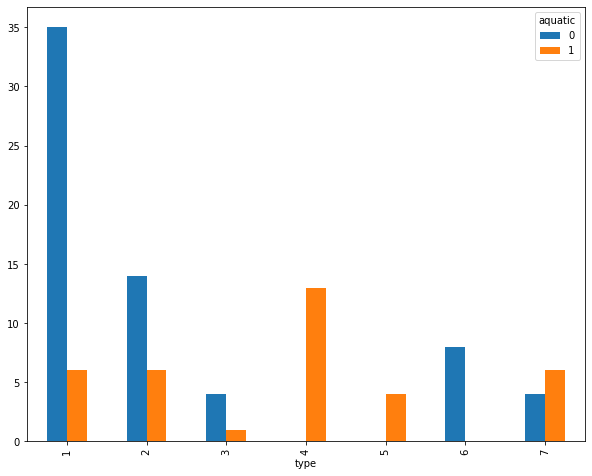

In [308]:
# Plot the aquatic category & type 
pd.crosstab(zoo.type,zoo.aquatic).plot(kind="bar",figsize=(10,8));

Mostly aquatic animals are fish which belongs to type 4, but  few animals with type 7, 2, 1, 5, 3.


In [309]:
zoo.venomous.value_counts()

0    93
1     8
Name: venomous, dtype: int64

In [310]:
pd.crosstab(zoo.type,zoo.venomous)

venomous,0,1
type,,
1,41,0
2,20,0
3,3,2
4,12,1
5,3,1
6,6,2
7,8,2


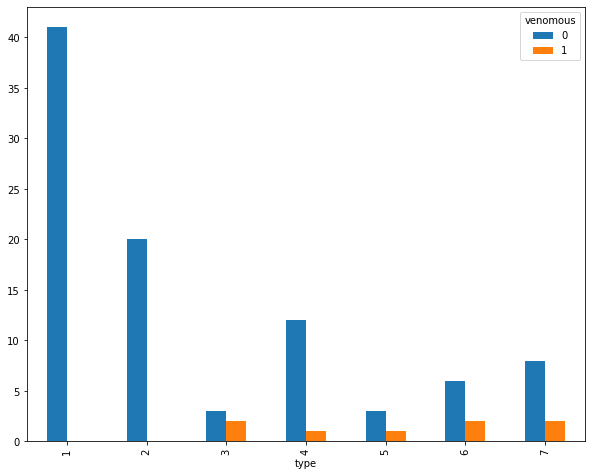

In [311]:
# Plot the venomous category & type 
pd.crosstab(zoo.type,zoo.venomous).plot(kind="bar",figsize=(10,8));

# Built the model

# Create Feature vs target matrix


In [312]:
x=zoo.iloc[:,1:17]  # Feature(X)= all columns(except target column=type)
x

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [313]:
y=zoo.iloc[:,17]    # Target(Y)= Type
y

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64

# Split the data into Train & Test

In [314]:

from sklearn.model_selection import train_test_split

In [315]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

# KNN classifier Implmentation

In [316]:
Kcls=KNeighborsClassifier(n_neighbors=5,metric="manhattan",p=2)

In [317]:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

KNeighborsClassifier(metric='manhattan')

# Train Model

In [318]:
Kcls.fit(x_train,y_train)

KNeighborsClassifier(metric='manhattan')

# Predictions

In [319]:
y_pred=Kcls.predict(x_test)
y_pred

array([5, 4, 4, 1, 1, 1, 2, 4, 1, 1, 7, 1, 2, 7, 4, 6, 1, 6, 2, 4, 2, 4,
       1, 2, 1, 1, 1, 2, 4, 4, 4], dtype=int64)

# Evaluation

# Accuracy check

In [320]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score

In [321]:
co = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', co)

print('\nTrue Positives(TP) = ', co[0,0])

print('\nTrue Negatives(TN) = ', co[1,1])

print('\nFalse Positives(FP) = ', co[0,1])

print('\nFalse Negatives(FN) = ', co[1,0])

Confusion matrix

 [[11  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0]
 [ 0  0  0  2  0  0  0]
 [ 0  0  0  7  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  2]]

True Positives(TP) =  11

True Negatives(TN) =  6

False Positives(FP) =  0

False Negatives(FN) =  0


In [322]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         6
           3       0.00      0.00      0.00         2
           4       0.78      1.00      0.88         7
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           0.94        31
   macro avg       0.83      0.86      0.84        31
weighted avg       0.89      0.94      0.91        31



In [323]:
print('Accuracy of KNN Regression:',accuracy_score(y_test,y_pred))

Accuracy of KNN Regression: 0.9354838709677419


# Grid Search for Algorithm Tuning

In [324]:
from sklearn.model_selection import GridSearchCV

In [325]:
n_neighbors = np.array(range(1,15))
param_grid = dict(n_neighbors=n_neighbors)

In [326]:
Kcls=KNeighborsClassifier()
grid=GridSearchCV(estimator=Kcls,param_grid=param_grid)
grid.fit(x,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [327]:
print(grid.best_score_)
print(grid.best_params_)

0.97
{'n_neighbors': 1}


In [328]:
# Visualizing  results


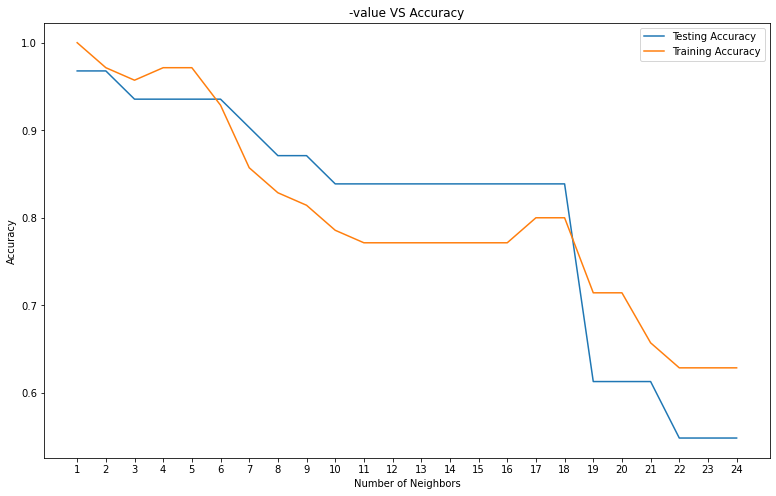

Best accuracy is 0.967741935483871 with K = 1


In [329]:
k_values = np.arange(1,25)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(k_values):
    # k from 1 to 25(exclude)
    Kcls = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    Kcls.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(Kcls.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(Kcls.score(x_test, y_test))
# Plot
plt.figure(figsize=[13,8])
plt.plot(k_values, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_values, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))


# Compare with Logistic regression classifier

In [330]:
from sklearn.linear_model import LogisticRegression

In [331]:
Kcls_Log=LogisticRegression(random_state=0)

In [332]:
Kcls_Log.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [333]:
y_pred_log=Kcls_Log.predict(x_test)

In [334]:
print('Accuracy of Logistic regression classifier:',accuracy_score(y_test,y_pred_log))

Accuracy of Logistic regression classifier: 0.967741935483871


# Conclusion:

The accuracy score of KNN classifer &  Logistic regression classifier showing  similar score of 0.9677..

Can be try to use diffrenet data or number of neighour in KNN classifier & then can check the model accuracy.


So at the end we can use any classifer between KNN & Logistic Regression to predict the data.

    